# Amcache Analysis

Throught this notebook we will to analyze the amcache registry that have information about applications executed on the system.

Imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'iframe' # or 'notebook' or 'colab'
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)


We will support our notebook with amcache.py for parsing the registry file, this script can be download from https://github.com/williballenthin/python-registry

In [2]:
%run amcache.py ../Evidence/Amcache.hve

Import the csv generated by amcache parser tools.

In [3]:
df = pd.read_csv('amcache.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   path                  1120 non-null   object 
 1   sha1                  1120 non-null   object 
 2   size                  11 non-null     float64
 3   file_description      11 non-null     object 
 4   source_key_timestamp  1120 non-null   object 
 5   created_timestamp     1120 non-null   object 
 6   modified_timestamp    1120 non-null   object 
 7   modified_timestamp2   1120 non-null   object 
 8   linker_timestamp      1120 non-null   object 
 9   product               5 non-null      object 
 10  company               4 non-null      object 
 11  pe_sizeofimage        11 non-null     float64
 12  version_number        5 non-null      object 
 13  version               11 non-null     object 
 14  language              11 non-null     float64
 15  header_hash          

Format the dates on dataframe

In [4]:
df['source_key_timestamp'] = pd.to_datetime(df['source_key_timestamp'],format='%Y/%m/%d %H:%M:%S' )
df['created_timestamp'] = pd.to_datetime(df['created_timestamp'],format='%Y/%m/%d %H:%M:%S', errors = 'coerce')
df['modified_timestamp'] = pd.to_datetime(df['modified_timestamp'],format='%Y/%m/%d %H:%M:%S', errors = 'coerce')
df['modified_timestamp2'] = pd.to_datetime(df['modified_timestamp2'],format='%Y/%m/%d %H:%M:%S', errors = 'coerce')
df['linker_timestamp'] = pd.to_datetime(df['linker_timestamp'],format='%Y/%m/%d %H:%M:%S', errors = 'coerce')

View the registers by modified timestamp, searching anomalies on incdent dates.

In [5]:
dates = df["modified_timestamp2"]
dates.index = dates.dt.to_period('d')
s = dates.groupby(level=0).size()
s.sort_values(ascending=False).head(10)

modified_timestamp2
2017-08-01    520
2017-03-17    146
2015-11-20    145
2017-07-19     92
2016-07-16     51
2016-08-25     20
2010-03-18     18
2015-11-19     16
2016-07-05     10
2017-06-29     10
Freq: D, Name: modified_timestamp2, dtype: int64

Graphic data for visualize better the dates

<AxesSubplot:xlabel='modified_timestamp2'>

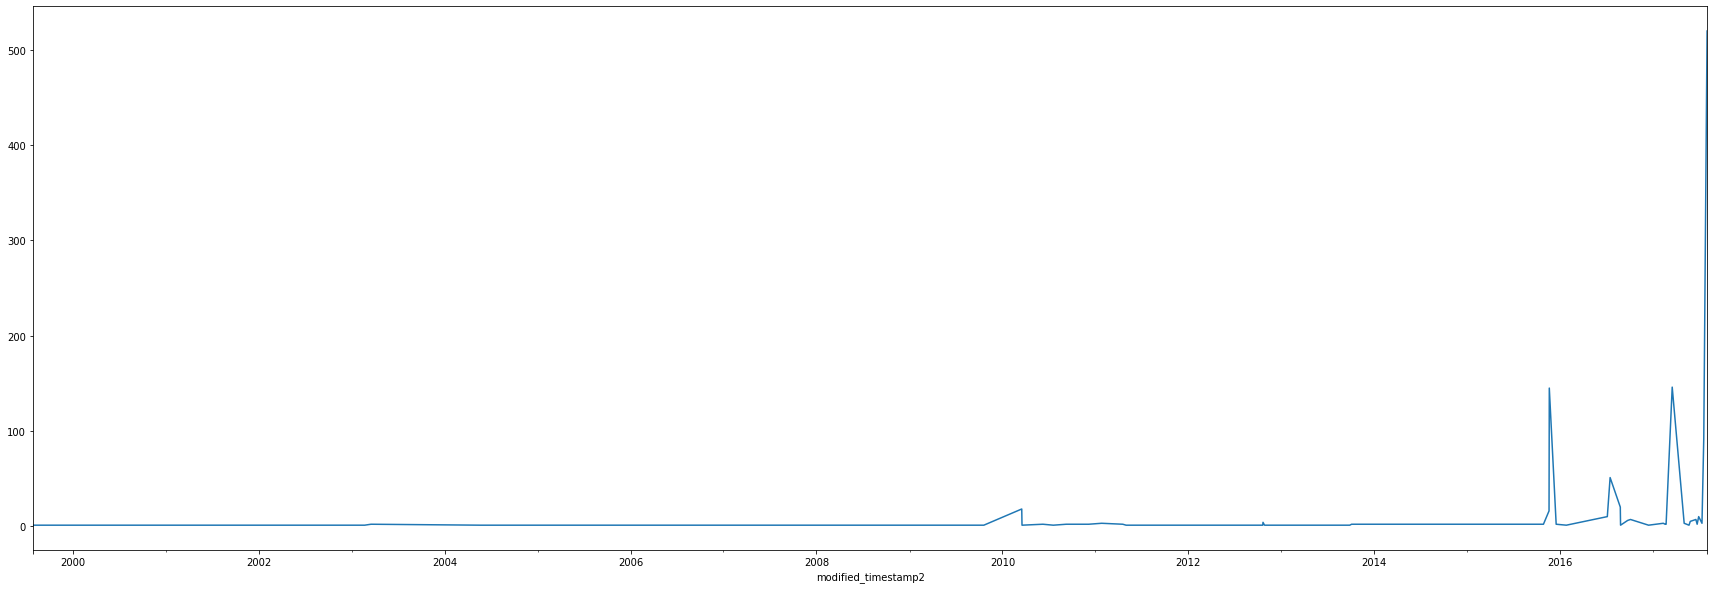

In [6]:
s.plot(figsize=(30,10))

If we need to analyze some dates is very good idea limit tha analysis dates.

In [7]:
df.loc[~df.index.duplicated(), :]
data_min = df[(df["modified_timestamp2"] >'2017-05-01 00:00:00') & (df["modified_timestamp2"] < '2017-09-01 00:00:00')]
fig = px.histogram(data_min, x="modified_timestamp2", marginal="violin", title='Histogram amCache')
fig.show()

Searching for exe files.

In [8]:
datafiltered_1 = df[df.path.str.contains(".exe")] 
datafiltered = datafiltered_1.groupby(['sha1'])['id'].count().to_frame()
datafiltered.sort_values('id', ascending=False ).head(10)

,id
sha1,
0000407ae0e7834fa03d13b798c91ae5b8f042541d8a,2
0000a7276a0d3f99af67720501688d39e034a092097e,2
00009ad9ebfb99fb168a13fded7f1ca3f6580c8f76de,2
000015d6665609507e1eeacd4048aa01f6ee52b463fd,2
00006bcaef17188851ae64fbad84bbb20170a4ac3138,2
000012d4ad658a7bd949833915ec41549604b2a63d46,2
0000ae6a632241f38649ebe2ae06b71967b553b3ffc2,1
0000af7e54a0075cb05f6bd18f246c9714f9b5ad576d,1
00009f7251022ea0db74286bf8d766b4ae751c061c88,1


In [9]:
df[df['sha1'] == '0000a7276a0d3f99af67720501688d39e034a092097e'][['path']]

,path
508,c:\users\user\appdata\local\jetbrains\installations\dotpeek08\TokenGenerator.exe
517,c:\users\user\appdata\local\jetbrains\installations\dotpeek08\psitasks\TokenGenerator.exe
